In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np


# Load dataset
iris = load_iris()

# Convert to pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].apply(lambda x: iris.target_names[x])
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

In [10]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
species_name          object
dtype: object

In [11]:
df['species_name'].value_counts()


species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

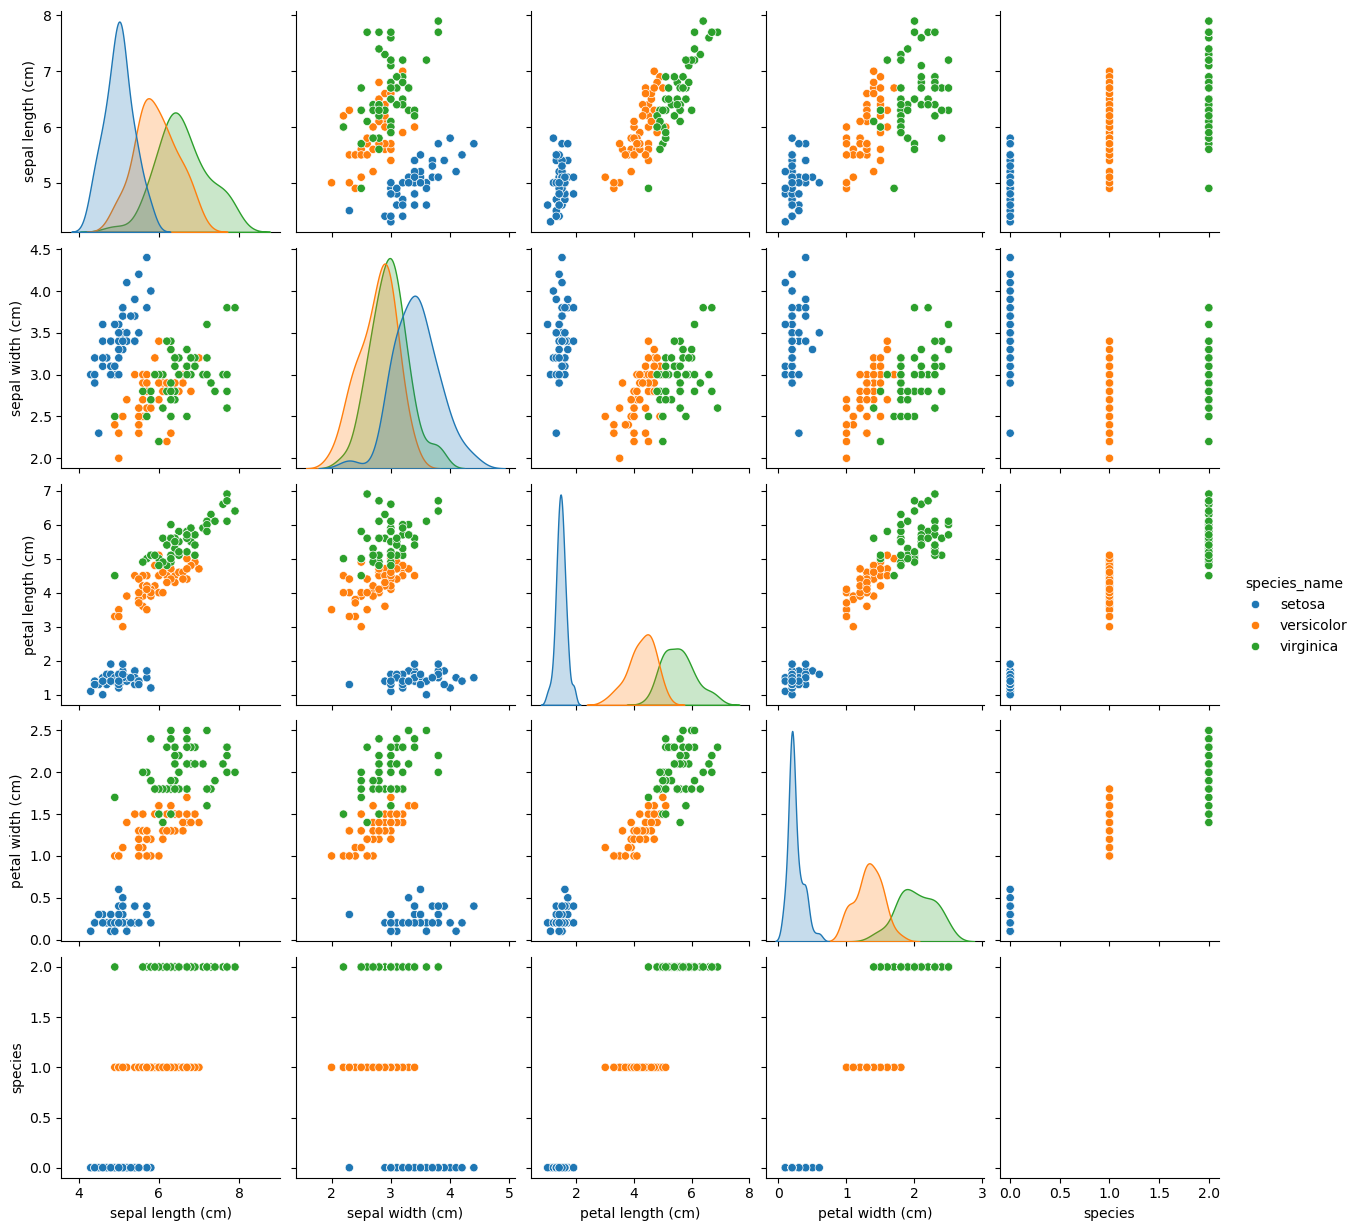

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species_name')
plt.show()

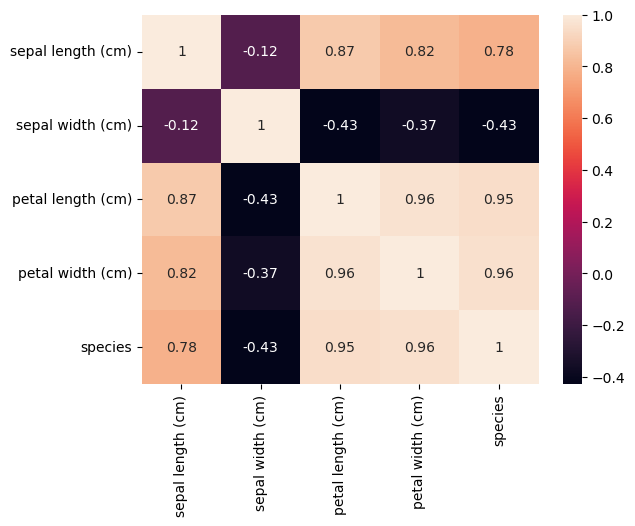

In [13]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

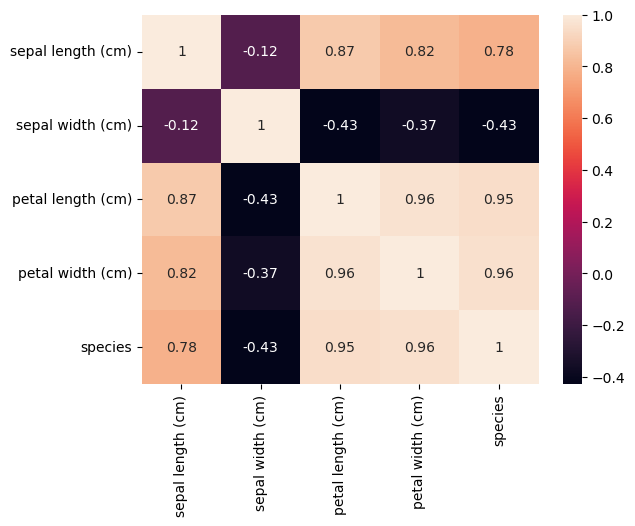

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X = df[iris.feature_names]     # Features
y = df['species']              # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)
print(y)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [26]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(max_iter=200)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [18]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)


DecisionTreeClassifier()

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[1 0 2 3]
[0.03334028 0.         0.38926487 0.57739485]
[0.         0.03334028 0.38926487 0.57739485]
range(0, 4)


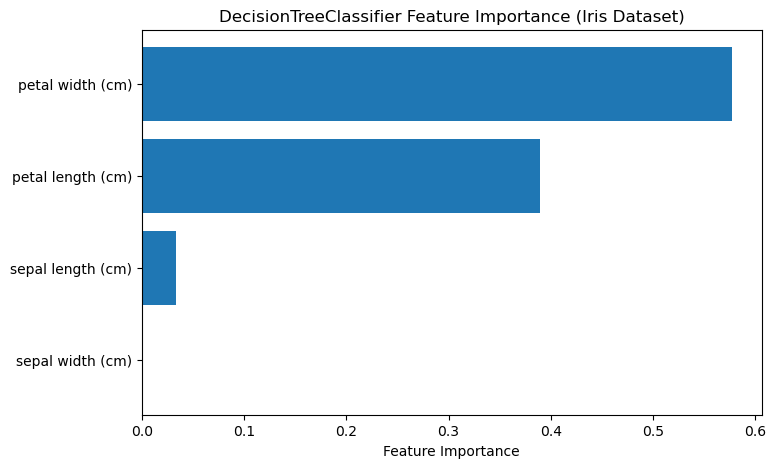

In [40]:
importances = model3.feature_importances_
indices = importances.argsort()
print(indices)
print(importances)
print(importances[indices])
print(range(len(importances)))

plt.figure(figsize=(8, 5))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [iris.feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("DecisionTreeClassifier Feature Importance (Iris Dataset)")
plt.show()

In [20]:
sample = [[5.1, 3.5, 1.4, 0.2]]  # Example: Setosa
prediction = model1.predict(sample)
print("Predicted class:", iris.target_names[prediction[0]])

Predicted class: setosa


c:\Users\UseR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 10)
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)

Best params: {'n_neighbors': 3}


In [22]:
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: Mean accuracy = {scores.mean():.4f}")

Logistic Regression: Mean accuracy = 0.9733
KNN: Mean accuracy = 0.9733
Decision Tree: Mean accuracy = 0.9667


0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool
0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
145    

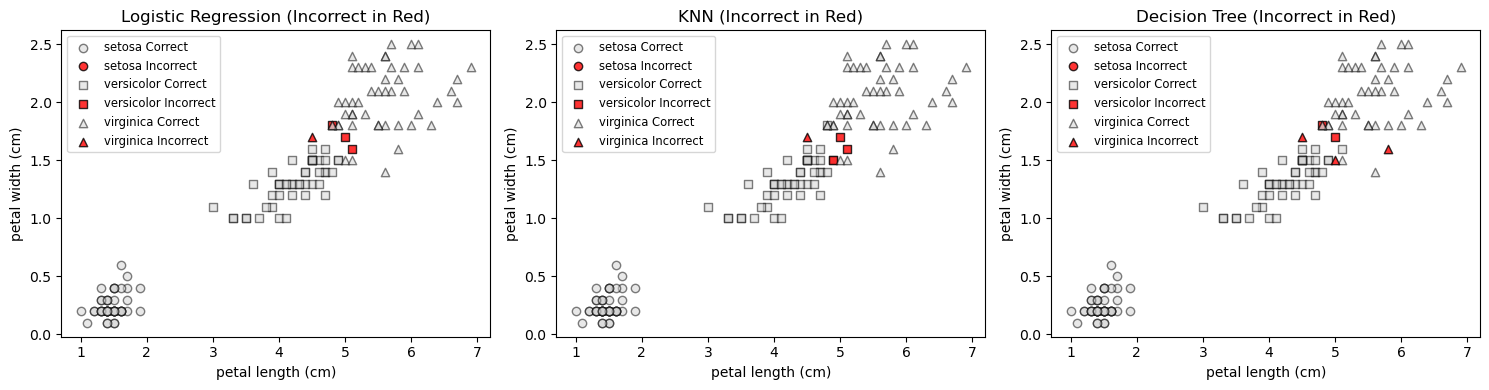

In [41]:
from sklearn.model_selection import cross_val_predict


# Choose which features to plot (change these as desired)
x_attr = iris.feature_names[2]
y_attr = iris.feature_names[3]
markers = ['o', 's', '^']  

plt.figure(figsize=(15, 4))
for idx, (name, model) in enumerate(models.items()):
    y_pred = cross_val_predict(model, X, y, cv=5)
    incorrect = y_pred != y

    plt.subplot(1, 3, idx + 1)
    for species in np.unique(y):
        mask = (y == species)
        print(mask)
        plt.scatter(
            X[x_attr].values[mask & ~incorrect],
            X[y_attr].values[mask & ~incorrect],
            c='lightgray', marker=markers[species], label=f'{iris.target_names[species]} Correct', alpha=0.5, edgecolor='k'
        )
        plt.scatter(
            X[x_attr].values[mask & incorrect],
            X[y_attr].values[mask & incorrect],
            c='red', marker=markers[species], label=f'{iris.target_names[species]} Incorrect', alpha=0.8, edgecolor='k'
        )
    plt.xlabel(x_attr)
    plt.ylabel(y_attr)
    plt.title(f"{name} (Incorrect in Red)")
    plt.legend(fontsize='small', loc='best')

plt.tight_layout()
plt.show()

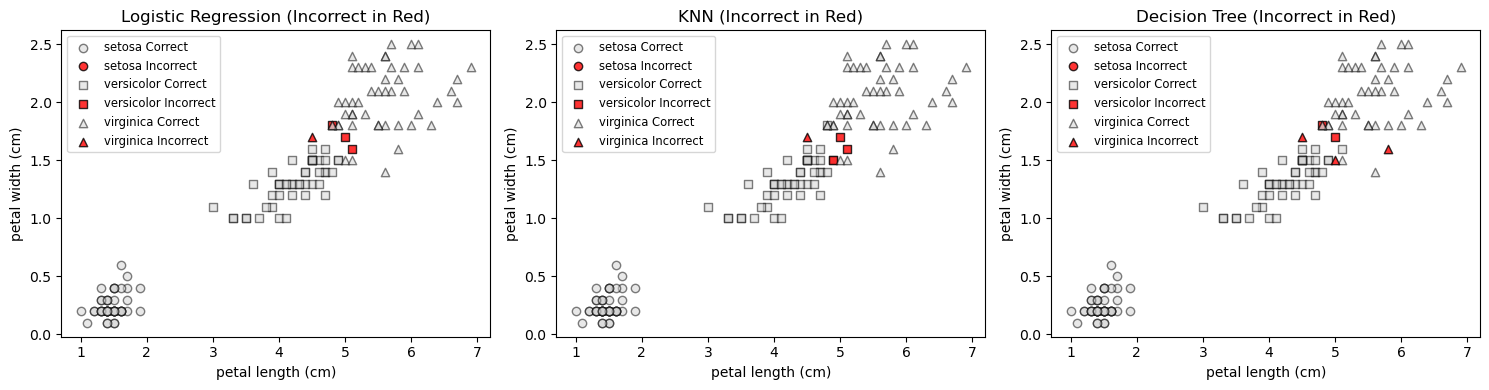

In [ ]:
from sklearn.model_selection import cross_val_predict

# Helper to get column from X (works for DataFrame or ndarray)
def get_col(X, col):
    if hasattr(X, 'columns'):
        return X[col].values
    else:
        return X[:, iris.feature_names.index(col)]

# Choose which features to plot (change these as desired)
x_attr = iris.feature_names[2]
y_attr = iris.feature_names[3]
markers = ['o', 's', '^']  

# Train and plot
plt.figure(figsize=(15, 4))
for idx, (name, model) in enumerate(models.items()):
    y_pred = cross_val_predict(model, X, y, cv=5)
    incorrect = y_pred != y

    plt.subplot(1, 3, idx + 1)
    for species in np.unique(y):
        mask = (y == species)
        plt.scatter(
            get_col(X, x_attr)[mask & ~incorrect],
            get_col(X, y_attr)[mask & ~incorrect],
            c='lightgray', marker=markers[species], label=f'{iris.target_names[species]} Correct', alpha=0.5, edgecolor='k'
        )
        plt.scatter(
            get_col(X, x_attr)[mask & incorrect],
            get_col(X, y_attr)[mask & incorrect],
            c='red', marker=markers[species], label=f'{iris.target_names[species]} Incorrect', alpha=0.8, edgecolor='k'
        )
    plt.xlabel(x_attr)
    plt.ylabel(y_attr)
    plt.title(f"{name} (Incorrect in Red)")
    plt.legend(fontsize='small', loc='best')

plt.tight_layout()
plt.show()

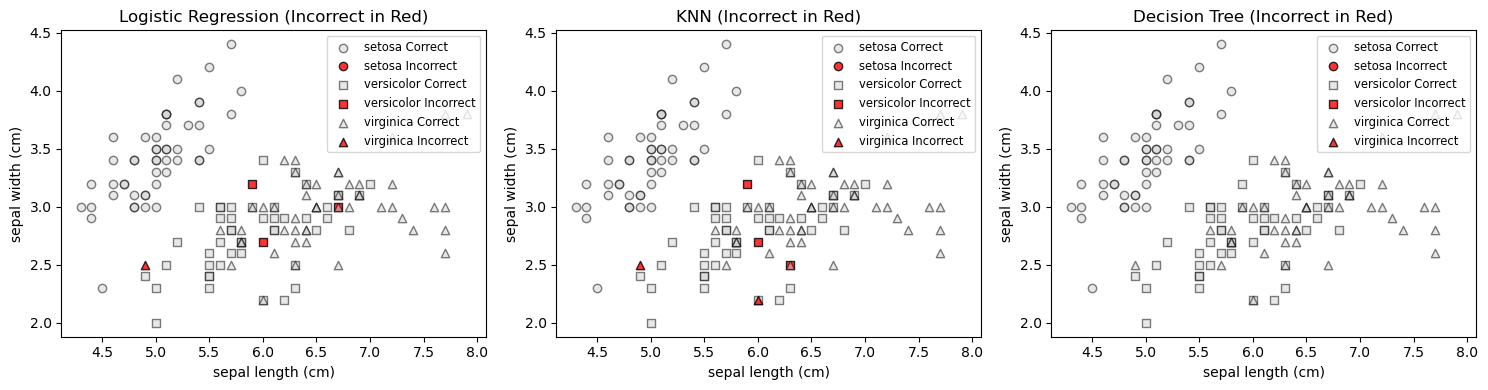

In [ ]:
# Choose which features to plot (change these as desired)
x_attr = iris.feature_names[0]  # e.g., 'sepal length (cm)'
y_attr = iris.feature_names[1]  # e.g., 'sepal width (cm)'
markers = ['o', 's', '^']  

# Support both DataFrame and ndarray for X
def get_col(X, col):
    if hasattr(X, 'columns'):
        return X[col].values
    else:
        return X[:, iris.feature_names.index(col)]

# Train and plot
plt.figure(figsize=(15, 4))
for idx, (name, model) in enumerate(models.items()):
    model.fit(X, y)
    y_pred = model.predict(X)
    incorrect = y_pred != y
    
    plt.subplot(1, 3, idx + 1)
    for species in np.unique(y):
        mask = (y == species)
        
        plt.scatter(get_col(X, x_attr)[mask & ~incorrect], get_col(X, y_attr)[mask & ~incorrect],
                    c='lightgray', marker=markers[species], label=f'{iris.target_names[species]} Correct', alpha=0.5, edgecolor='k'
                    )
        
        plt.scatter(get_col(X, x_attr)[mask & incorrect], get_col(X, y_attr)[mask & incorrect],
                    c='red', marker=markers[species], label=f'{iris.target_names[species]} Incorrect', alpha=0.8, edgecolor='k'
                    )
        
    plt.xlabel(x_attr)
    plt.ylabel(y_attr)
    plt.title(f"{name} (Incorrect in Red)")
    plt.legend(fontsize='small', loc='best')

plt.tight_layout()
plt.show()

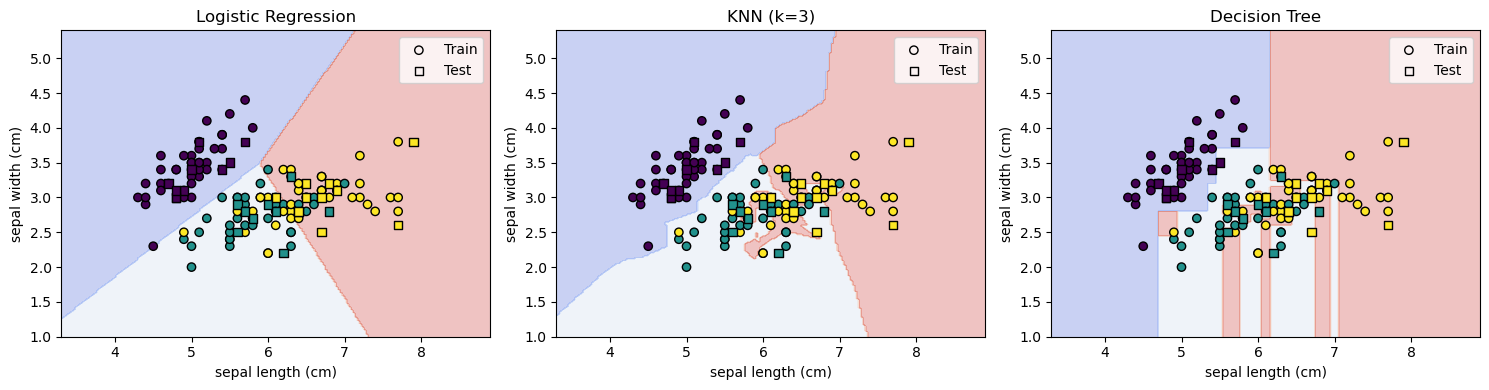

In [ ]:
X = iris.data[:, :2]  # Use only first two features (sepal length & sepal width)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and plot
plt.figure(figsize=(15, 4))
for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1, 3, idx + 1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test')
    plt.title(name)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    legend = plt.legend()
    # Make legend markers hollow for scatter plots
    for lh in legend.legend_handles:
        if hasattr(lh, 'set_facecolor') and hasattr(lh, 'set_edgecolor'):
            lh.set_facecolor('none')
            lh.set_edgecolor('k')

plt.tight_layout()
plt.show()